## Load Data from CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [2]:
# Set up paths
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)
output_dir = os.path.join(project_root, "outputs")
os.makedirs(output_dir, exist_ok=True)

In [3]:
# Load and prepare data
df = pd.read_csv(os.path.join(output_dir, 'results.csv'))
df['fairness_score'] = 1 - df['fairness_score']

## Results Tables

In [4]:
# Set column orders for display
columns_order = ['ml_algorithm', 'fairness_mode', 'alpha_mode', 'alpha_value', 'test_accuracy', 'fairness_score']

In [5]:
# Group and display results by ML algorithm, fairness mode, alpha mode
for ml in df['ml_algorithm'].unique():
    for fairness in df['fairness_mode'].unique():
        for alpha in df['alpha_mode'].unique():
            subset = df[
                (df['ml_algorithm'] == ml) &
                (df['fairness_mode'] == fairness) &
                (df['alpha_mode'] == alpha)
            ][columns_order]

            if not subset.empty:
                subset[['test_accuracy', 'fairness_score']] = subset[['test_accuracy', 'fairness_score']].round(4)

                print(f"\n=== ML Algorithm: {ml} | Fairness Mode: {fairness} | Alpha Mode: {alpha} ===")
                display(subset.sort_values(by='alpha_value')) 


=== ML Algorithm: MLP | Fairness Mode: AE | Alpha Mode: const ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,fairness_score
0,MLP,AE,const,0.00,0.2354,0.7955
1,MLP,AE,const,0.05,0.7541,0.7959
2,MLP,AE,const,0.10,0.7844,0.7784
3,MLP,AE,const,0.15,0.7172,0.8780
4,MLP,AE,const,0.20,0.6870,0.9659
5,MLP,AE,const,0.25,0.7622,0.9192
6,MLP,AE,const,0.30,0.8173,0.7763
7,MLP,AE,const,0.35,0.7541,0.7959
8,MLP,AE,const,0.40,0.7407,0.9734
9,MLP,AE,const,0.45,0.7814,0.9001



=== ML Algorithm: MLP | Fairness Mode: AE | Alpha Mode: linear_decrease ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,fairness_score
21,MLP,AE,linear_decrease,0.00,0.8035,0.8266
22,MLP,AE,linear_decrease,0.05,0.7748,0.9106
23,MLP,AE,linear_decrease,0.10,0.7762,0.9129
24,MLP,AE,linear_decrease,0.15,0.7868,0.8792
25,MLP,AE,linear_decrease,0.20,0.7801,0.8929
26,MLP,AE,linear_decrease,0.25,0.8005,0.8732
27,MLP,AE,linear_decrease,0.30,0.7850,0.8640
28,MLP,AE,linear_decrease,0.35,0.7786,0.8841
29,MLP,AE,linear_decrease,0.40,0.7919,0.9116
30,MLP,AE,linear_decrease,0.45,0.7894,0.8798



=== ML Algorithm: MLP | Fairness Mode: AE | Alpha Mode: linear_increase ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,fairness_score
42,MLP,AE,linear_increase,0.00,0.7767,0.9320
43,MLP,AE,linear_increase,0.05,0.8284,0.7397
44,MLP,AE,linear_increase,0.10,0.7800,0.9073
45,MLP,AE,linear_increase,0.15,0.7897,0.8525
46,MLP,AE,linear_increase,0.20,0.7898,0.8720
47,MLP,AE,linear_increase,0.25,0.7885,0.8850
48,MLP,AE,linear_increase,0.30,0.8174,0.8029
49,MLP,AE,linear_increase,0.35,0.7805,0.9018
50,MLP,AE,linear_increase,0.40,0.8147,0.7876
51,MLP,AE,linear_increase,0.45,0.7940,0.8744



=== ML Algorithm: MLP | Fairness Mode: SP | Alpha Mode: const ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,fairness_score
63,MLP,SP,const,0.00,0.2459,1.0000
64,MLP,SP,const,0.05,0.7541,1.0000
65,MLP,SP,const,0.10,0.7541,1.0000
66,MLP,SP,const,0.15,0.7541,1.0000
67,MLP,SP,const,0.20,0.7541,1.0000
68,MLP,SP,const,0.25,0.8130,0.9859
69,MLP,SP,const,0.30,0.8226,0.9480
70,MLP,SP,const,0.35,0.8149,0.9794
71,MLP,SP,const,0.40,0.8197,0.9715
72,MLP,SP,const,0.45,0.8239,0.9752



=== ML Algorithm: MLP | Fairness Mode: SP | Alpha Mode: linear_decrease ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,fairness_score
84,MLP,SP,linear_decrease,0.00,0.8298,0.9790
85,MLP,SP,linear_decrease,0.05,0.8193,0.9915
86,MLP,SP,linear_decrease,0.10,0.8301,0.9618
87,MLP,SP,linear_decrease,0.15,0.8218,0.9874
88,MLP,SP,linear_decrease,0.20,0.8190,0.9950
89,MLP,SP,linear_decrease,0.25,0.8310,0.9545
90,MLP,SP,linear_decrease,0.30,0.8313,0.9742
91,MLP,SP,linear_decrease,0.35,0.8246,0.9567
92,MLP,SP,linear_decrease,0.40,0.8282,0.9527
93,MLP,SP,linear_decrease,0.45,0.8254,0.9796



=== ML Algorithm: MLP | Fairness Mode: SP | Alpha Mode: linear_increase ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,fairness_score
105,MLP,SP,linear_increase,0.00,0.8299,0.9731
106,MLP,SP,linear_increase,0.05,0.8257,0.9727
107,MLP,SP,linear_increase,0.10,0.8272,0.9866
108,MLP,SP,linear_increase,0.15,0.7541,1.0000
109,MLP,SP,linear_increase,0.20,0.7541,1.0000
110,MLP,SP,linear_increase,0.25,0.8293,0.9842
111,MLP,SP,linear_increase,0.30,0.8320,0.9696
112,MLP,SP,linear_increase,0.35,0.8349,0.9663
113,MLP,SP,linear_increase,0.40,0.8203,0.9913
114,MLP,SP,linear_increase,0.45,0.8228,0.9876



=== ML Algorithm: MLP | Fairness Mode: EOP | Alpha Mode: const ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,fairness_score
126,MLP,EOP,const,0.00,0.2459,1.0000
127,MLP,EOP,const,0.05,0.7541,1.0000
128,MLP,EOP,const,0.10,0.7541,1.0000
129,MLP,EOP,const,0.15,0.7541,1.0000
130,MLP,EOP,const,0.20,0.7541,1.0000
131,MLP,EOP,const,0.25,0.7541,1.0000
132,MLP,EOP,const,0.30,0.7541,1.0000
133,MLP,EOP,const,0.35,0.7541,1.0000
134,MLP,EOP,const,0.40,0.8406,0.9541
135,MLP,EOP,const,0.45,0.8445,0.9805



=== ML Algorithm: MLP | Fairness Mode: EOP | Alpha Mode: linear_decrease ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,fairness_score
147,MLP,EOP,linear_decrease,0.00,0.8437,0.9564
148,MLP,EOP,linear_decrease,0.05,0.8424,0.9860
149,MLP,EOP,linear_decrease,0.10,0.8432,0.9901
150,MLP,EOP,linear_decrease,0.15,0.8450,0.9755
151,MLP,EOP,linear_decrease,0.20,0.8414,0.9473
152,MLP,EOP,linear_decrease,0.25,0.8415,0.9755
153,MLP,EOP,linear_decrease,0.30,0.8421,0.9686
154,MLP,EOP,linear_decrease,0.35,0.8437,0.9836
155,MLP,EOP,linear_decrease,0.40,0.8398,0.9904
156,MLP,EOP,linear_decrease,0.45,0.8358,0.9959



=== ML Algorithm: MLP | Fairness Mode: EOP | Alpha Mode: linear_increase ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,fairness_score
168,MLP,EOP,linear_increase,0.00,0.8432,0.9431
169,MLP,EOP,linear_increase,0.05,0.8390,0.9302
170,MLP,EOP,linear_increase,0.10,0.8440,0.9861
171,MLP,EOP,linear_increase,0.15,0.8400,0.9536
172,MLP,EOP,linear_increase,0.20,0.8450,0.9881
173,MLP,EOP,linear_increase,0.25,0.8428,0.9961
174,MLP,EOP,linear_increase,0.30,0.8390,0.9958
175,MLP,EOP,linear_increase,0.35,0.8399,0.9517
176,MLP,EOP,linear_increase,0.40,0.8410,0.9700
177,MLP,EOP,linear_increase,0.45,0.8447,0.9793



=== ML Algorithm: MLP | Fairness Mode: PE | Alpha Mode: const ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,fairness_score
189,MLP,PE,const,0.00,0.7541,1.0000
190,MLP,PE,const,0.05,0.7644,0.9998
191,MLP,PE,const,0.10,0.7541,1.0000
192,MLP,PE,const,0.15,0.8272,0.9844
193,MLP,PE,const,0.20,0.8295,0.9844
194,MLP,PE,const,0.25,0.8324,0.9872
195,MLP,PE,const,0.30,0.8238,0.9910
196,MLP,PE,const,0.35,0.8320,0.9951
197,MLP,PE,const,0.40,0.8403,0.9724
198,MLP,PE,const,0.45,0.8418,0.9691



=== ML Algorithm: MLP | Fairness Mode: PE | Alpha Mode: linear_decrease ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,fairness_score
210,MLP,PE,linear_decrease,0.00,0.8407,0.9926
211,MLP,PE,linear_decrease,0.05,0.8411,1.0000
212,MLP,PE,linear_decrease,0.10,0.8436,0.9781
213,MLP,PE,linear_decrease,0.15,0.8426,0.9683
214,MLP,PE,linear_decrease,0.20,0.7541,1.0000
215,MLP,PE,linear_decrease,0.25,0.8411,0.9965
216,MLP,PE,linear_decrease,0.30,0.8376,0.9916
217,MLP,PE,linear_decrease,0.35,0.8391,0.9921
218,MLP,PE,linear_decrease,0.40,0.8414,0.9798
219,MLP,PE,linear_decrease,0.45,0.8294,0.9957



=== ML Algorithm: MLP | Fairness Mode: PE | Alpha Mode: linear_increase ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,fairness_score
231,MLP,PE,linear_increase,0.00,0.8395,0.9862
232,MLP,PE,linear_increase,0.05,0.8443,0.9713
233,MLP,PE,linear_increase,0.10,0.8407,0.9897
234,MLP,PE,linear_increase,0.15,0.8395,0.9802
235,MLP,PE,linear_increase,0.20,0.8424,0.9691
236,MLP,PE,linear_increase,0.25,0.8435,0.9830
237,MLP,PE,linear_increase,0.30,0.8433,0.9789
238,MLP,PE,linear_increase,0.35,0.8445,0.9774
239,MLP,PE,linear_increase,0.40,0.8407,0.9797
240,MLP,PE,linear_increase,0.45,0.8379,0.9880



=== ML Algorithm: LR | Fairness Mode: AE | Alpha Mode: const ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,fairness_score
252,LR,AE,const,0.00,0.3559,0.8945
253,LR,AE,const,0.05,0.5349,0.9270
254,LR,AE,const,0.10,0.6385,0.9338
255,LR,AE,const,0.15,0.6999,0.9197
256,LR,AE,const,0.20,0.7496,0.8714
257,LR,AE,const,0.25,0.7456,0.8846
258,LR,AE,const,0.30,0.6943,0.9062
259,LR,AE,const,0.35,0.7281,0.8676
260,LR,AE,const,0.40,0.7516,0.9035
261,LR,AE,const,0.45,0.7713,0.8652



=== ML Algorithm: LR | Fairness Mode: AE | Alpha Mode: linear_decrease ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,fairness_score
273,LR,AE,linear_decrease,0.00,0.7700,0.8620
274,LR,AE,linear_decrease,0.05,0.7749,0.8702
275,LR,AE,linear_decrease,0.10,0.7725,0.8780
276,LR,AE,linear_decrease,0.15,0.7606,0.8870
277,LR,AE,linear_decrease,0.20,0.7745,0.8685
278,LR,AE,linear_decrease,0.25,0.7602,0.8952
279,LR,AE,linear_decrease,0.30,0.7714,0.8891
280,LR,AE,linear_decrease,0.35,0.7646,0.8867
281,LR,AE,linear_decrease,0.40,0.7687,0.8909
282,LR,AE,linear_decrease,0.45,0.7491,0.9237



=== ML Algorithm: LR | Fairness Mode: AE | Alpha Mode: linear_increase ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,fairness_score
294,LR,AE,linear_increase,0.00,0.7725,0.8470
295,LR,AE,linear_increase,0.05,0.7721,0.8812
296,LR,AE,linear_increase,0.10,0.7459,0.8630
297,LR,AE,linear_increase,0.15,0.7445,0.9369
298,LR,AE,linear_increase,0.20,0.7491,0.9134
299,LR,AE,linear_increase,0.25,0.7582,0.8868
300,LR,AE,linear_increase,0.30,0.7687,0.8625
301,LR,AE,linear_increase,0.35,0.7325,0.9017
302,LR,AE,linear_increase,0.40,0.7538,0.9095
303,LR,AE,linear_increase,0.45,0.7714,0.8822



=== ML Algorithm: LR | Fairness Mode: SP | Alpha Mode: const ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,fairness_score
315,LR,SP,const,0.00,0.4404,0.9817
316,LR,SP,const,0.05,0.7612,0.9898
317,LR,SP,const,0.10,0.7946,0.9904
318,LR,SP,const,0.15,0.8029,0.9775
319,LR,SP,const,0.20,0.8020,0.9610
320,LR,SP,const,0.25,0.8005,0.9590
321,LR,SP,const,0.30,0.7987,0.9527
322,LR,SP,const,0.35,0.7961,0.9606
323,LR,SP,const,0.40,0.8025,0.9551
324,LR,SP,const,0.45,0.8021,0.9690



=== ML Algorithm: LR | Fairness Mode: SP | Alpha Mode: linear_decrease ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,fairness_score
336,LR,SP,linear_decrease,0.00,0.7927,0.9637
337,LR,SP,linear_decrease,0.05,0.7990,0.9621
338,LR,SP,linear_decrease,0.10,0.7979,0.9638
339,LR,SP,linear_decrease,0.15,0.8005,0.9683
340,LR,SP,linear_decrease,0.20,0.7977,0.9551
341,LR,SP,linear_decrease,0.25,0.7960,0.9786
342,LR,SP,linear_decrease,0.30,0.7976,0.9769
343,LR,SP,linear_decrease,0.35,0.7950,0.9676
344,LR,SP,linear_decrease,0.40,0.7885,0.9749
345,LR,SP,linear_decrease,0.45,0.7890,0.9645



=== ML Algorithm: LR | Fairness Mode: SP | Alpha Mode: linear_increase ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,fairness_score
357,LR,SP,linear_increase,0.00,0.7973,0.9655
358,LR,SP,linear_increase,0.05,0.7961,0.9803
359,LR,SP,linear_increase,0.10,0.7996,0.9574
360,LR,SP,linear_increase,0.15,0.7859,0.9867
361,LR,SP,linear_increase,0.20,0.7995,0.9557
362,LR,SP,linear_increase,0.25,0.8026,0.9730
363,LR,SP,linear_increase,0.30,0.7994,0.9710
364,LR,SP,linear_increase,0.35,0.7946,0.9665
365,LR,SP,linear_increase,0.40,0.8044,0.9721
366,LR,SP,linear_increase,0.45,0.8039,0.9696



=== ML Algorithm: LR | Fairness Mode: EOP | Alpha Mode: const ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,fairness_score
378,LR,EOP,const,0.00,0.6464,0.9869
379,LR,EOP,const,0.05,0.7808,0.9839
380,LR,EOP,const,0.10,0.7895,0.9865
381,LR,EOP,const,0.15,0.7966,0.9823
382,LR,EOP,const,0.20,0.8076,0.9773
383,LR,EOP,const,0.25,0.7998,0.9793
384,LR,EOP,const,0.30,0.8043,0.9920
385,LR,EOP,const,0.35,0.7981,0.9874
386,LR,EOP,const,0.40,0.8029,0.9929
387,LR,EOP,const,0.45,0.8050,0.9552



=== ML Algorithm: LR | Fairness Mode: EOP | Alpha Mode: linear_decrease ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,fairness_score
399,LR,EOP,linear_decrease,0.00,0.8057,0.9997
400,LR,EOP,linear_decrease,0.05,0.8108,0.9552
401,LR,EOP,linear_decrease,0.10,0.7984,0.9842
402,LR,EOP,linear_decrease,0.15,0.8037,0.9932
403,LR,EOP,linear_decrease,0.20,0.8051,0.9967
404,LR,EOP,linear_decrease,0.25,0.7998,0.9539
405,LR,EOP,linear_decrease,0.30,0.7909,0.9487
406,LR,EOP,linear_decrease,0.35,0.7975,0.9399
407,LR,EOP,linear_decrease,0.40,0.8092,0.9969
408,LR,EOP,linear_decrease,0.45,0.7960,0.9842



=== ML Algorithm: LR | Fairness Mode: EOP | Alpha Mode: linear_increase ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,fairness_score
420,LR,EOP,linear_increase,0.00,0.8047,0.9553
421,LR,EOP,linear_increase,0.05,0.8024,0.9888
422,LR,EOP,linear_increase,0.10,0.8080,0.9816
423,LR,EOP,linear_increase,0.15,0.8059,0.9525
424,LR,EOP,linear_increase,0.20,0.8035,0.9926
425,LR,EOP,linear_increase,0.25,0.8047,0.9892
426,LR,EOP,linear_increase,0.30,0.8033,0.9630
427,LR,EOP,linear_increase,0.35,0.8080,0.9933
428,LR,EOP,linear_increase,0.40,0.8035,0.9792
429,LR,EOP,linear_increase,0.45,0.8081,0.9890



=== ML Algorithm: LR | Fairness Mode: PE | Alpha Mode: const ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,fairness_score
441,LR,PE,const,0.00,0.3356,0.9885
442,LR,PE,const,0.05,0.7912,0.9999
443,LR,PE,const,0.10,0.7900,0.9793
444,LR,PE,const,0.15,0.7930,0.9876
445,LR,PE,const,0.20,0.8041,0.9819
446,LR,PE,const,0.25,0.8035,0.9907
447,LR,PE,const,0.30,0.8013,0.9864
448,LR,PE,const,0.35,0.8118,0.9942
449,LR,PE,const,0.40,0.7960,0.9892
450,LR,PE,const,0.45,0.7915,0.9954



=== ML Algorithm: LR | Fairness Mode: PE | Alpha Mode: linear_decrease ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,fairness_score
462,LR,PE,linear_decrease,0.00,0.8022,0.9880
463,LR,PE,linear_decrease,0.05,0.8114,0.9965
464,LR,PE,linear_decrease,0.10,0.7988,0.9820
465,LR,PE,linear_decrease,0.15,0.7994,0.9943
466,LR,PE,linear_decrease,0.20,0.8054,0.9921
467,LR,PE,linear_decrease,0.25,0.8009,0.9981
468,LR,PE,linear_decrease,0.30,0.8029,0.9955
469,LR,PE,linear_decrease,0.35,0.8104,0.9955
470,LR,PE,linear_decrease,0.40,0.7999,0.9992
471,LR,PE,linear_decrease,0.45,0.8021,0.9821



=== ML Algorithm: LR | Fairness Mode: PE | Alpha Mode: linear_increase ===


,ml_algorithm,fairness_mode,alpha_mode,alpha_value,test_accuracy,fairness_score
483,LR,PE,linear_increase,0.00,0.8089,0.9951
484,LR,PE,linear_increase,0.05,0.8059,0.9993
485,LR,PE,linear_increase,0.10,0.7999,0.9998
486,LR,PE,linear_increase,0.15,0.8067,0.9885
487,LR,PE,linear_increase,0.20,0.8022,0.9983
488,LR,PE,linear_increase,0.25,0.8082,0.9935
489,LR,PE,linear_increase,0.30,0.8108,0.9918
490,LR,PE,linear_increase,0.35,0.8072,0.9969
491,LR,PE,linear_increase,0.40,0.8048,0.9960
492,LR,PE,linear_increase,0.45,0.8020,0.9995


In [6]:
df.groupby('ml_algorithm')[['test_accuracy', 'fairness_score']].agg(['min', 'median', 'mean', 'std', 'max']).round(4)

test_accuracy                                 fairness_score  \
                       min  median    mean     std     max            min   
ml_algorithm                                                                
LR                  0.3356  0.7997  0.7854  0.0535  0.8220         0.6725   
MLP                 0.2354  0.8322  0.8131  0.0701  0.8516         0.7304   

                                           
              median    mean     std  max  
ml_algorithm                               
LR            0.9707  0.9498  0.0562  1.0  
MLP           0.9714  0.9419  0.0652  1.0

In [7]:
df.groupby('fairness_mode')[['test_accuracy', 'fairness_score']].agg(['min', 'median', 'mean', 'std', 'max']).round(4)

test_accuracy                                 fairness_score  \
                        min  median    mean     std     max            min   
fairness_mode                                                                
AE                   0.2354  0.7773  0.7680  0.0713  0.8500         0.7304   
EOP                  0.2459  0.8080  0.8119  0.0589  0.8516         0.6725   
PE                   0.3356  0.8118  0.8148  0.0488  0.8514         0.8597   
SP                   0.2459  0.8041  0.8023  0.0636  0.8497         0.7642   

                                               
               median    mean     std     max  
fairness_mode                                  
AE             0.8717  0.8634  0.0491  0.9734  
EOP            0.9818  0.9730  0.0344  1.0000  
PE             0.9912  0.9851  0.0191  1.0000  
SP             0.9706  0.9621  0.0398  1.0000

In [8]:
df.groupby('alpha_mode')[['test_accuracy', 'fairness_score']].agg(['min', 'median', 'mean', 'std', 'max']).round(4)

test_accuracy                                 fairness_score  \
                          min  median    mean     std     max            min   
alpha_mode                                                                     
const                  0.2354  0.8036  0.7820  0.1018  0.8516         0.6725   
linear_decrease        0.7491  0.8022  0.8055  0.0254  0.8450         0.7959   
linear_increase        0.7325  0.8066  0.8103  0.0282  0.8477         0.7329   

                                              
                 median    mean     std  max  
alpha_mode                                    
const            0.9720  0.9401  0.0708  1.0  
linear_decrease  0.9746  0.9536  0.0483  1.0  
linear_increase  0.9694  0.9440  0.0613  1.0

## Line Charts - Accuracy vs Alpha & Fairness vs Alpha

In [9]:
def plot_line_charts(df, model_name):
    """Plot line charts for accuracy and fairness per alpha_value."""
    df_model = df[df['ml_algorithm'] == model_name]

    unique_alpha_modes = df_model['alpha_mode'].unique()

    for alpha_mode in unique_alpha_modes:
        # Create subplot for current alpha_mode 
        fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

        # Filtering for certain alpha_mode
        df_alpha = df_model[df_model['alpha_mode'] == alpha_mode]

        # --- Accuracy ---
        for mode in df_alpha['fairness_mode'].unique():
            subset = df_alpha[df_alpha['fairness_mode'] == mode]
            axes[0].plot(subset['alpha_value'], subset['test_accuracy'], marker='o', label=mode)

        axes[0].set_title(f"Accuracy vs Alpha for \"{alpha_mode}\" scheduling strategy", fontsize=14)
        axes[0].set_xlabel("Alpha", fontsize=12)
        axes[0].set_ylabel("Accuracy", fontsize=12)
        axes[0].legend(title="Fairness criterion", loc='lower right', fontsize=12, title_fontsize=12)
        axes[0].grid(True)
        axes[0].set_xlim(-0.02, 1.02)
        axes[0].set_ylim(0.5, 1)
        axes[0].tick_params(axis='both', labelsize=12)

        # --- Fairness ---
        for mode in df_alpha['fairness_mode'].unique():
            subset = df_alpha[df_alpha['fairness_mode'] == mode]
            axes[1].plot(subset['alpha_value'], subset['fairness_score'], marker='o', label=mode)

        axes[1].set_title(f"Fairness vs Alpha for \"{alpha_mode}\" scheduling strategy", fontsize=14)
        axes[1].set_xlabel("Alpha", fontsize=12)
        axes[1].set_ylabel("Fairness", fontsize=12)
        axes[1].legend(title="Fairness criterion", loc='lower right', fontsize=12, title_fontsize=12)
        axes[1].grid(True)
        axes[1].set_xlim(-0.02, 1.02)
        axes[1].set_ylim(0.5, 1.02)
        axes[1].tick_params(axis='both', labelsize=12)

        # --- Figure ---
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.savefig(os.path.join(output_dir, f"{model_name}_{alpha_mode}_line_charts.png"), dpi=150, bbox_inches='tight')
        plt.show()

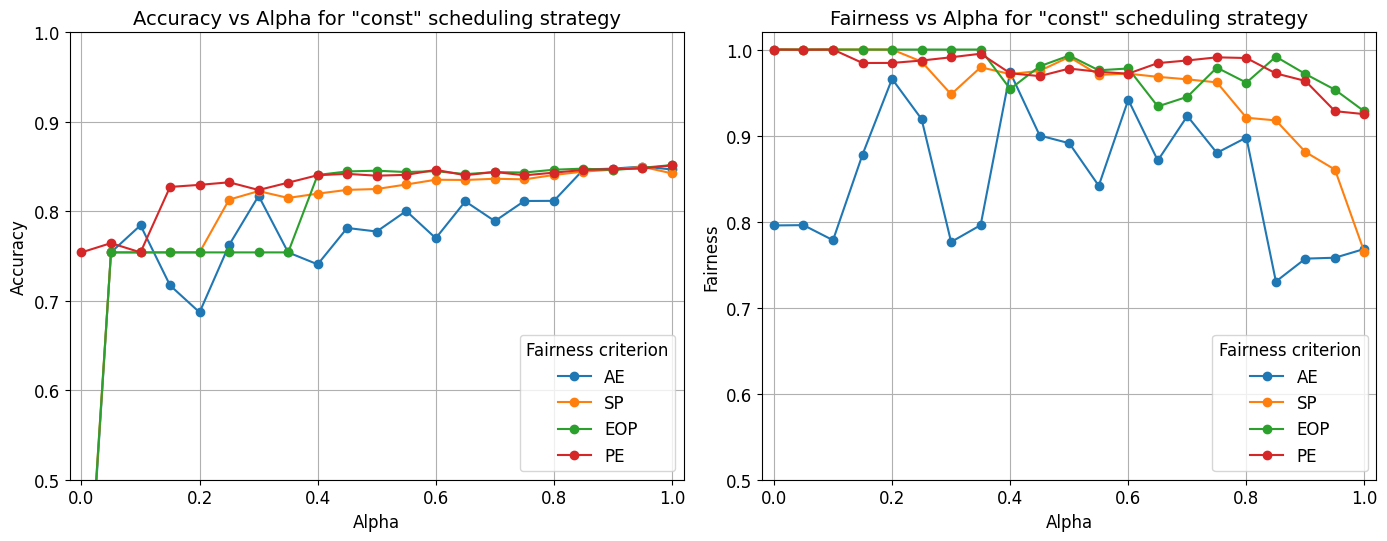

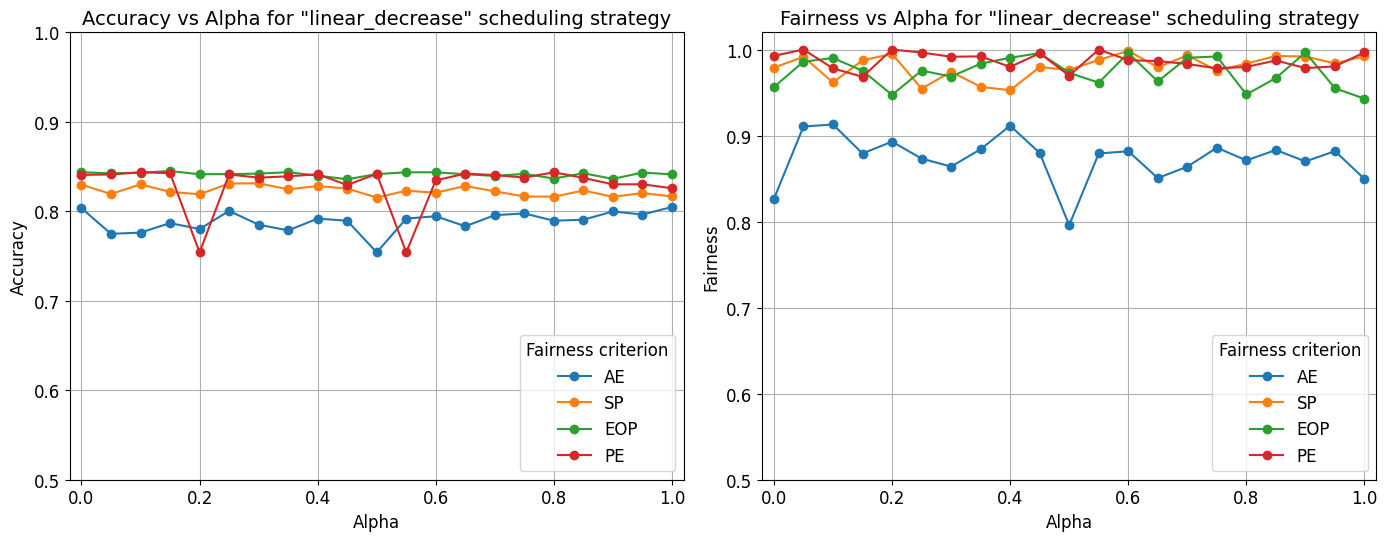

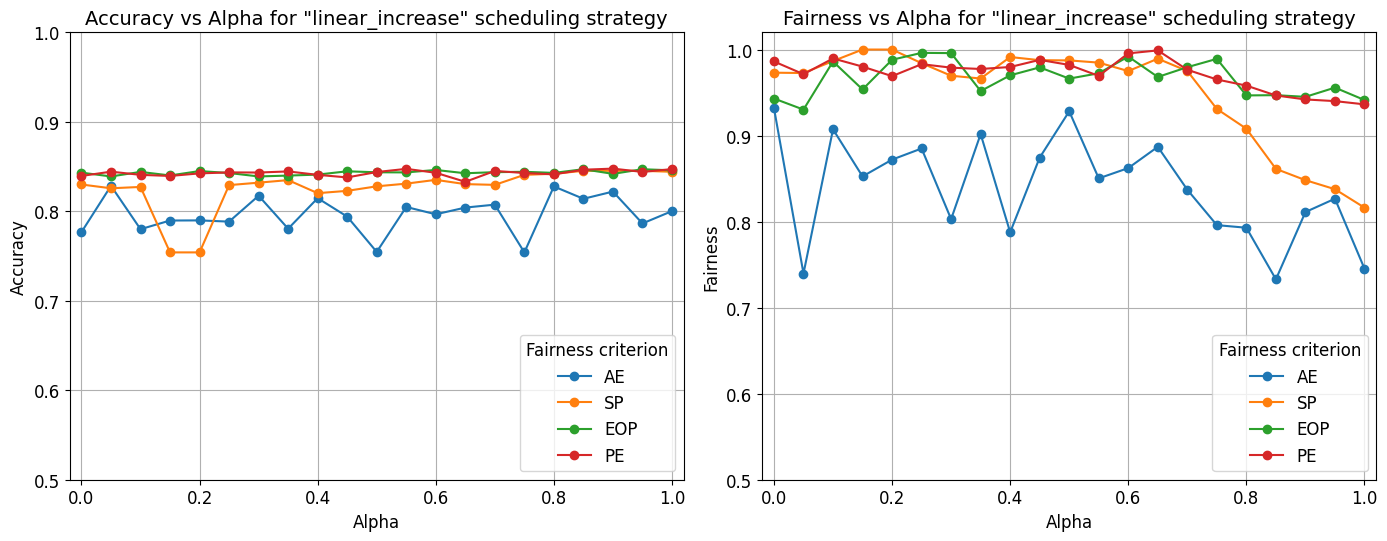

In [10]:
plot_line_charts(df, 'MLP')

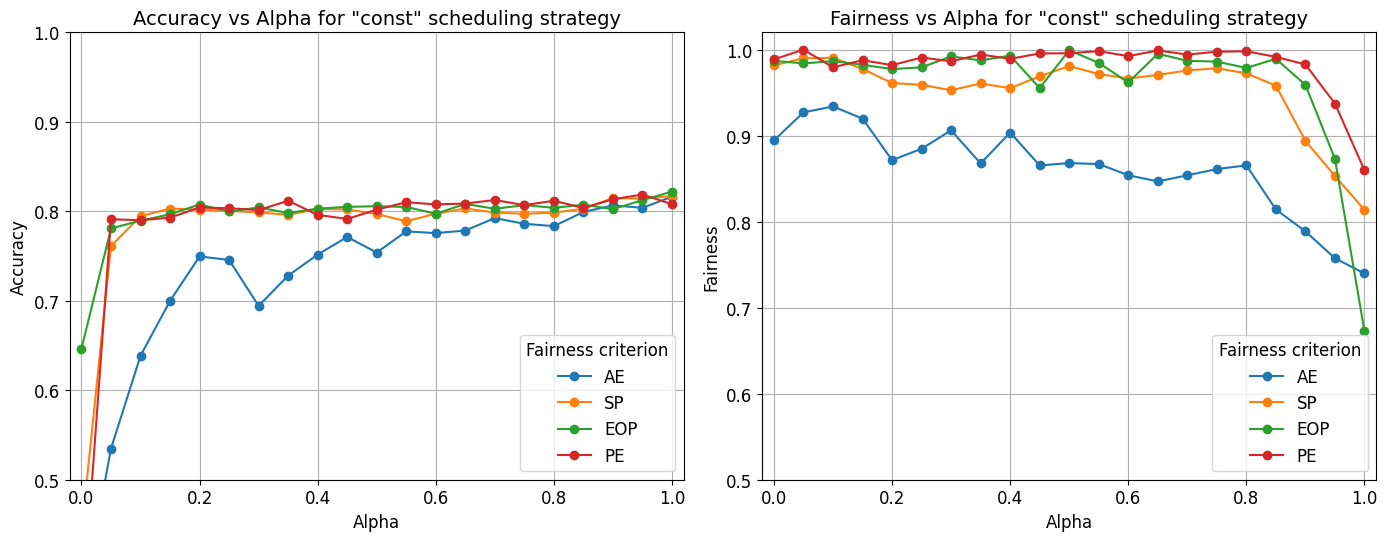

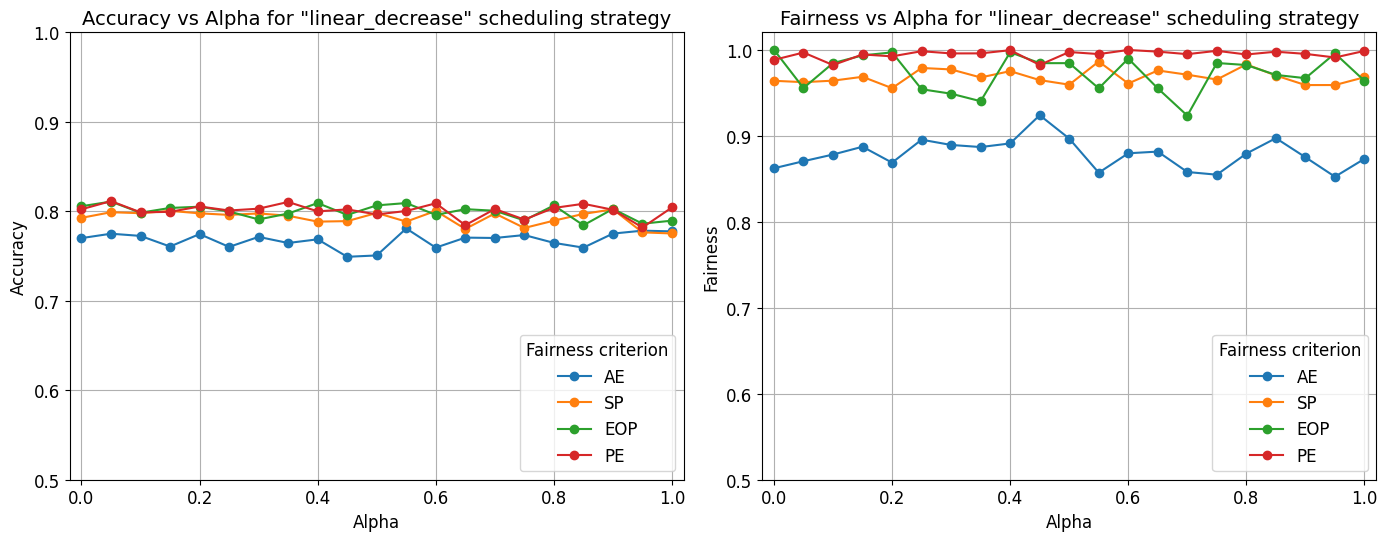

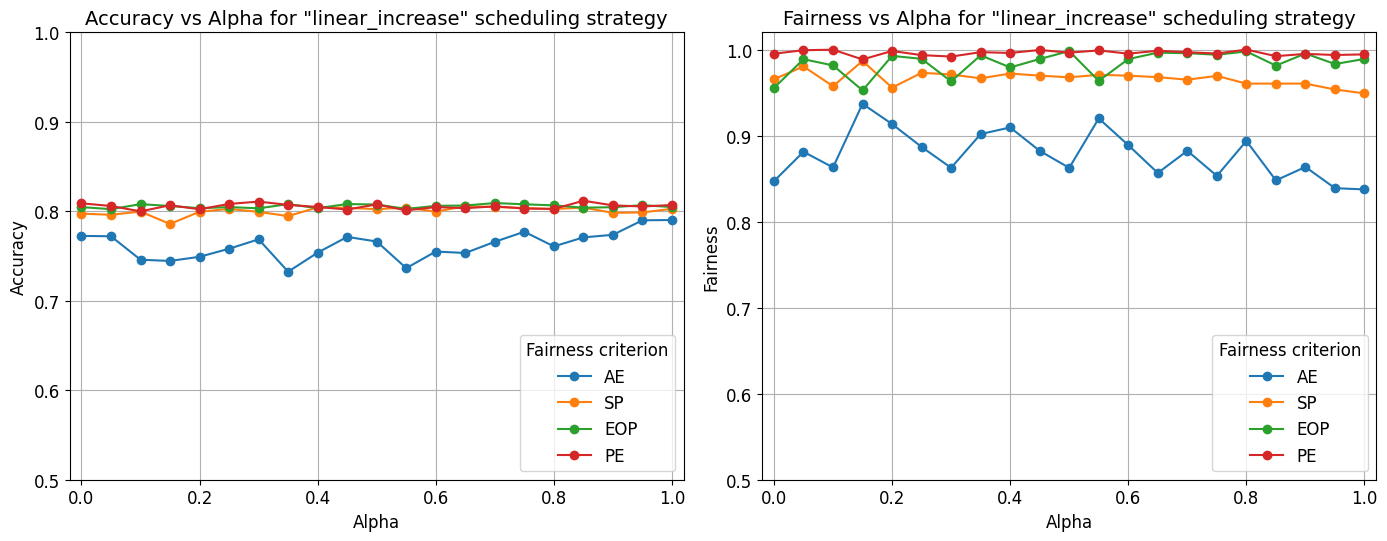

In [11]:
plot_line_charts(df, 'LR')

## Scatter plot charts with pareto fronts

In [12]:
def is_pareto_efficient(df):
    """Determine Pareto-efficient points from accuracy and fairness score."""
    data = -np.column_stack((df['test_accuracy'], df['fairness_score']))
    is_efficient = np.ones(data.shape[0], dtype=bool)

    for i, c in enumerate(data):
        if is_efficient[i]:
            is_efficient[is_efficient] = (
                np.any(data[is_efficient] < c, axis=1) |
                np.all(data[is_efficient] == c, axis=1)
            )
            is_efficient[i] = True

    return is_efficient

In [13]:
def plot_pareto_front(df, model_name):
    """Plot scatter chart for each fairness mode of a given model."""
    df_model = df[df['ml_algorithm'] == model_name].copy()
    df_model['score'] = df_model['test_accuracy'] + df_model['fairness_score']
    unique_fairness_modes = df_model['fairness_mode'].unique()

    # Subplot
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()

    # Color palette 
    alpha_modes = df['alpha_mode'].unique()
    palette = sns.color_palette('tab10', len(alpha_modes))
    color_dict = dict(zip(alpha_modes, palette))

    for idx, mode in enumerate(unique_fairness_modes):
        ax = axes[idx]
        df_mode = df_model[df_model['fairness_mode'] == mode]

        # Drop outliers
        df_mode = df_mode[df_mode['score'] >= 1.5]

        # Pareto front calculation
        pareto_mask = is_pareto_efficient(df_mode)
        pareto_df = df_mode[pareto_mask].sort_values(by="test_accuracy")

        # Plot Pareto front
        ax.plot(
            pareto_df['test_accuracy'],
            pareto_df['fairness_score'],
            color='red',
            linewidth=2,
            zorder=2,
            label="_nolegend_"
        )
        
        # Plot points
        for alpha_mode in alpha_modes:
            df_subset = df_mode[df_mode['alpha_mode'] == alpha_mode]
            ax.scatter(
                df_subset['test_accuracy'],
                df_subset['fairness_score'],
                alpha=0.6,
                zorder=3,
                label=f"{alpha_mode}",
                color=color_dict[alpha_mode]
            )

        ax.set_title(f"Accuracy vs Fairness for {mode}", fontsize=14)
        ax.set_xlabel("Accuracy", fontsize=12)
        ax.set_ylabel("Fairness", fontsize=12)
        ax.tick_params(axis='both', labelsize=12)
        ax.grid(True)
        ax.legend(title="$\\alpha$ scheduling strategy", loc='lower left', fontsize=11, title_fontsize=11)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(os.path.join(output_dir, f"{model_name}_scatter_charts.png"), dpi=150, bbox_inches='tight')
    plt.show()

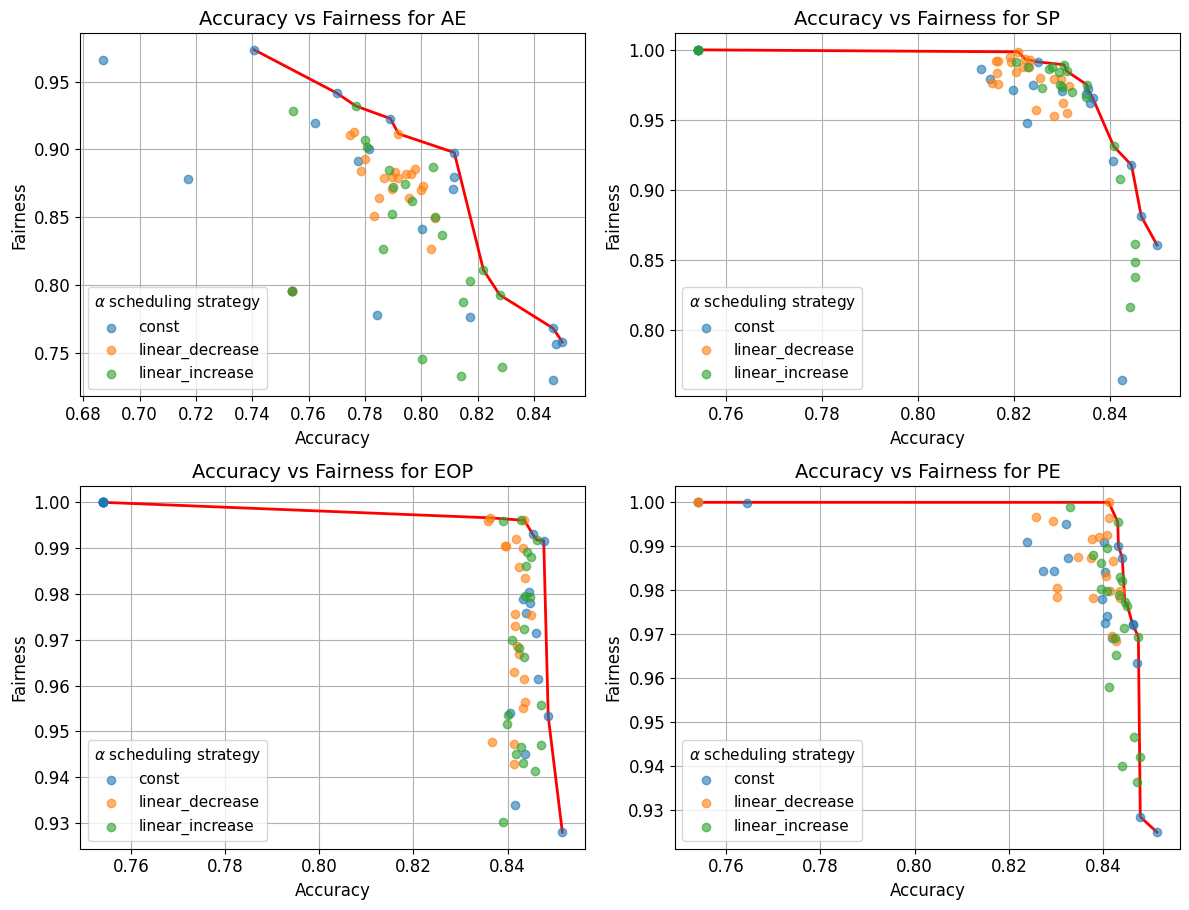

In [14]:
plot_pareto_front(df, "MLP")

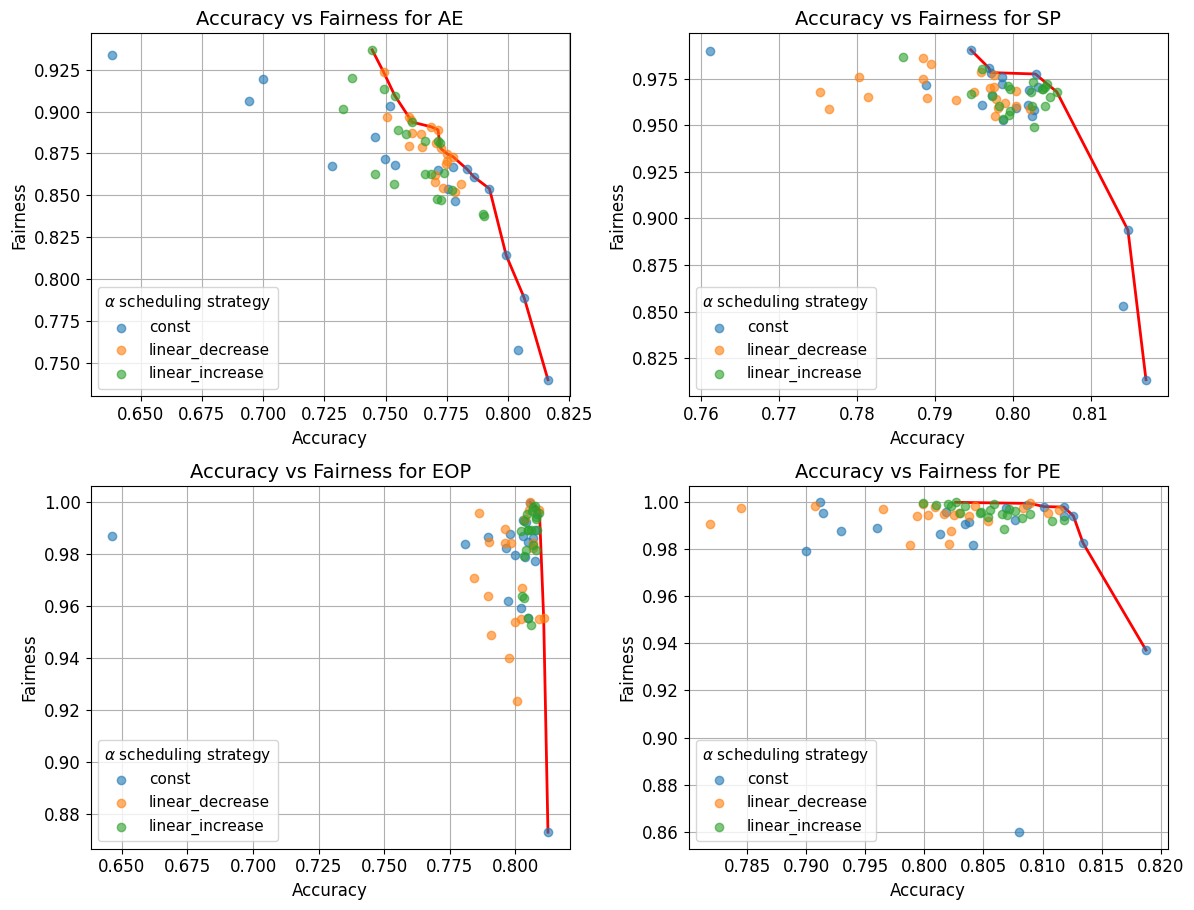

In [15]:
plot_pareto_front(df, "LR")